In [1]:
# 1.分词
import jieba
with open('report19.txt') as f:
    s = f.read()
word_list = list(jieba.cut(s))
print('分词总数:', len(word_list))
print('示例:', word_list[:20])

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/wm/18gdyt8563zdv_wpcgsgwd_40000gn/T/jieba.cache
Loading model cost 1.173 seconds.
Prefix dict has been built succesfully.


分词总数: 17746
示例: ['同志', '们', '：', '现在', '，', '我', '代表', '第十八届', '中央委员会', '向', '大会', '作', '报告', '。', ' ', '\n', '\n', '中国共产党', '第十九次', '全国代表大会']


In [2]:
# 2.统计词频
from collections import Counter
words_count = Counter(word_list)
most_words = words_count.most_common(128)
print(most_words)

[('，', 1345), ('、', 876), ('的', 660), ('。', 617), ('和', 353), ('\n', 340), ('发展', 212), (' ', 169), ('中国', 168), ('人民', 157), ('建设', 148), ('社会主义', 146), ('是', 139), ('坚持', 130), ('党', 103), ('国家', 90), ('在', 89), ('全面', 88), ('要', 85), ('实现', 83), ('制度', 83), ('推进', 81), ('社会', 80), ('政治', 80), ('特色', 79), ('新', 77), ('为', 72), ('加强', 71), ('体系', 68), ('文化', 66), ('我们', 64), ('时代', 63), ('“', 62), ('”', 62), ('必须', 61), ('经济', 59), ('伟大', 58), ('完善', 51), ('我国', 50), ('（', 50), ('）', 50), ('现代化', 47), ('推动', 47), ('以', 46), ('安全', 46), ('把', 44), ('创新', 44), ('更加', 44), ('民主', 44), ('中华民族', 43), ('工作', 42), ('了', 42), ('改革', 42), ('增强', 39), ('不断', 37), ('战略', 36), ('治理', 36), ('领导', 36), ('问题', 35), ('加快', 35), ('对', 34), ('世界', 34), ('中', 34), ('深化', 34), ('文明', 33), ('！', 33), ('复兴', 32), ('坚决', 32), ('到', 32), ('提高', 32), ('生态', 32), ('基本', 31), ('法治', 31), ('有', 31), ('思想', 30), ('上', 30), ('生活', 30), ('教育', 30), ('不', 29), ('等', 29), ('民族', 29), ('重大', 27), ('能力', 27), ('统一', 27

In [3]:
# 去除符号和助词、介词等
# 这一步我们做了人工干预，手动选出一些忽略词
most_words = [words for words in most_words if words[0] not in ' ，、。“”（）！；的和是在要为以把了对中到有上不等更二从大\n']
print(most_words)

[('发展', 212), ('中国', 168), ('人民', 157), ('建设', 148), ('社会主义', 146), ('坚持', 130), ('党', 103), ('国家', 90), ('全面', 88), ('实现', 83), ('制度', 83), ('推进', 81), ('社会', 80), ('政治', 80), ('特色', 79), ('新', 77), ('加强', 71), ('体系', 68), ('文化', 66), ('我们', 64), ('时代', 63), ('必须', 61), ('经济', 59), ('伟大', 58), ('完善', 51), ('我国', 50), ('现代化', 47), ('推动', 47), ('安全', 46), ('创新', 44), ('更加', 44), ('民主', 44), ('中华民族', 43), ('工作', 42), ('改革', 42), ('增强', 39), ('不断', 37), ('战略', 36), ('治理', 36), ('领导', 36), ('问题', 35), ('加快', 35), ('世界', 34), ('深化', 34), ('文明', 33), ('复兴', 32), ('坚决', 32), ('提高', 32), ('生态', 32), ('基本', 31), ('法治', 31), ('思想', 30), ('生活', 30), ('教育', 30), ('民族', 29), ('重大', 27), ('能力', 27), ('统一', 27), ('促进', 27), ('历史', 27), ('全党', 25), ('构建', 25), ('群众', 25), ('健全', 24), ('国际', 24), ('维护', 24), ('保障', 24), ('形成', 23), ('人类', 23), ('解决', 23), ('建成', 22), ('团结', 22), ('监督', 22), ('理论', 22), ('斗争', 22), ('实践', 22), ('事业', 21), ('机制', 21), ('协商', 21), ('保护', 21), ('组织', 21), ('统筹', 20), ('实施'

In [6]:
from wordcloud import WordCloud, ImageColorGenerator

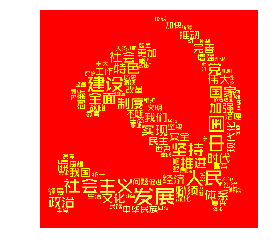

In [7]:
# 3.生成词云
# 生成词频 dict
dict_words = {}
for words in most_words:
    dict_words[words[0]] = words[1]

from wordcloud import WordCloud, ImageColorGenerator

# 读入图片
from scipy.misc import imread
bg_pic = imread('party.png')
# 配置词云参数
wc = WordCloud(
    # 因为中文显示，这里必须提供中文字体文件
    font_path = 'zhaozi.ttf',
    # 设置背景色
    background_color='red',
    # 词云形状
    mask=bg_pic,
    # 最大号字体
    max_font_size=100,
)
# 生成词云
wc.generate_from_frequencies(dict_words)
# 画图
import matplotlib.pyplot as plt
image_colors = ImageColorGenerator(bg_pic)
#获取到的颜色模板，第二个图
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
plt.show()

# 保存图片
wc.to_file('word_freq.jpg')

In [8]:
# 生成 ECharts 配置数据，拼接出 HTML
# 也可直接通过 ECharts 官网生成图表

words_list = []
count_list =[]
for word in most_words[:32]:
    words_list.append(word[0])
    count_list.append(word[1])

from IPython.display import HTML

# 指定图表的配置项和数据
option = """
var option = {
    title: {
        text: '十九大工作报告',
    },
    tooltip: {
        trigger: 'axis',
        axisPointer: {
            type: 'shadow'
        }
    },
    legend: {
        data: ['报告词频']
    },
    grid: {
        left: '3%',
        right: '4%',
        bottom: '3%',
        containLabel: true
    },
    xAxis: {
        type: 'value',
        boundaryGap: [0, 0.01]
    },
    yAxis: {
        type: 'category',
        data: """ + str(words_list[::-1]) + """
    },
    series: [
        {
            name: '报告词频',
            type: 'bar',
            data: """ + str(count_list[::-1]) + """
        }
    ]
};
"""

head = """
<div id="showhere" style="width:800px; height:600px;"></div> 
<script> 
require.config({ paths:{ echarts: '//cdn.bootcss.com/echarts/3.2.3/echarts.min', } });
require(['echarts'],function(ec){
var myChart = ec.init(document.getElementById('showhere'));
"""

tail = """
myChart.setOption(option);
    });
</script>
"""

HTML(head + option + tail)